# BUSINESS CASE : PRICE AND COST SCENARIOS

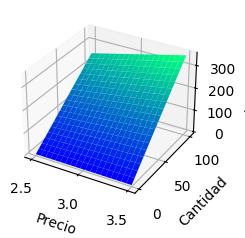

In [479]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


## Defining variables and constants

Primero se establecen las variables y constantes para los escenarios a probar, entre ellas precios, costos, numero de latas compradas por cliente, entre otras.

Tomamos como producto de entrada al Filete de caballa lydemar, el cual es un producto de buena calidad, buena presentación y buen precio de venta/costo.  
Entonces, tenemos un costo promedio por caja de 110 soles, incluyendo 48 latas cada caja nos da un costo promedio de 2.29 por lata, con ello, comenzamos a establecer posibles beneficios bajo distintos escenarios, siendo el que más retorno por cliente nos brinda cuando el precio es de 3.5 soles y nos compran por caja, siendo 58 soles lo que ganariamos por cada compra, claro está que esta es una situación perfecta, que a largo plazo se puede conseguir en varios clientes o incluso a corto plazo en algunos clientes que el producto les sea de agrado rápidamente.  
**¿Para qué debe servirnos este cuadro?** Para tener como referencia que empaquetados nos conviene, si bien es cierto lo ideal es vender bajo el primer escenario, no todos se animarán a pedir por 48 latas a ese precio, no al inicio, entonces, ahí es donde podemos hacer ofertas y vender más cantidad aunque bajemos un poco el precio, **¿Por qué?**, porque dado que inicialmente la idea de negocio esta pensada como entregar directo al consumidor final, esto significa hacer bastantes viajes, estos viajes implican tiempo/gasolina/etc, por lo tanto a veces puede ser más conveniente vender 48 latas a 3 c/u que 24 latas a 3.5 c/u,entre otros ejemplos, la idea es tratar de vender por 48 latas o 24 así sea bajando un poco el precio que vender por pequeñas cantidad a precio caro, porque esto repercutiria en el tiempo que nos demoramos en repartir y el costo que esto implica, **casi siempre es más beneficioso para nosotros vender por cantidades**.

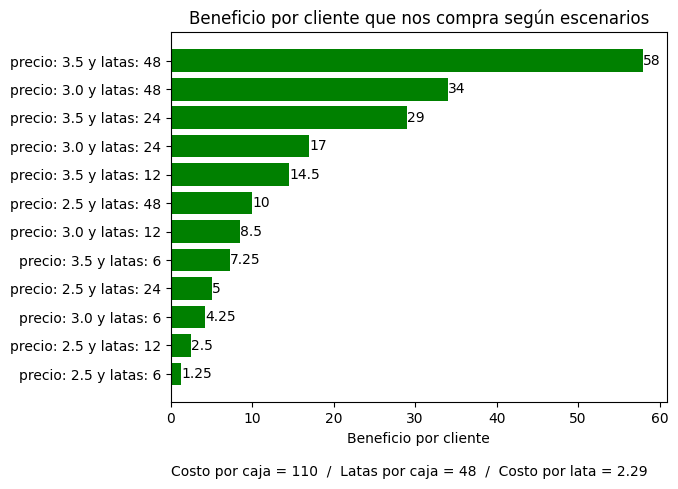

In [354]:
# price of the standard can fish (filete de caballa lydemar)
prices = np.array([2.5 , 3 , 3.5]) 

# costos
box_cost = 110
cans_per_box = 48
can_cost = box_cost / cans_per_box


# cans ordered per person 
number_cans = np.array([6 , 12 , 24 , 48])

# defining business functions
# benefit function includes different scenarios for prices and number_cans
def benefit(x , y , z):
    return ( (prices[y] - can_cost) * number_cans[z] ) * x



number_clients = np.arange(prices[0], 100 , 10)

def numb_cli(x):
    return np.arange(prices[0], x , x )

d = []
for x in range(len(number_cans)):
    for i in range(len(prices)) :
        d.append(
            [benefit( 1, i, x ) , 'precio: ' + str(prices[i]) + ' y latas: '+str(number_cans[x])]
            )

d=pd.DataFrame(d)
d = d.sort_values(0)
d.columns = ["utilidad" ,"descripcion"]

fig, ax = plt.subplots()
bars = ax.barh(d["descripcion"], d["utilidad"], color = "green")
plt.xlabel('Beneficio por cliente')
plt.title("Beneficio por cliente que nos compra según escenarios")
plt.annotate( 'Costo por caja = 110  /  Latas por caja = 48  /  Costo por lata = 2.29',xy = (0,-0.2), xycoords='axes fraction')
ax.bar_label(bars)
plt.show()


## Creating graph models

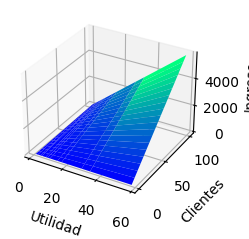

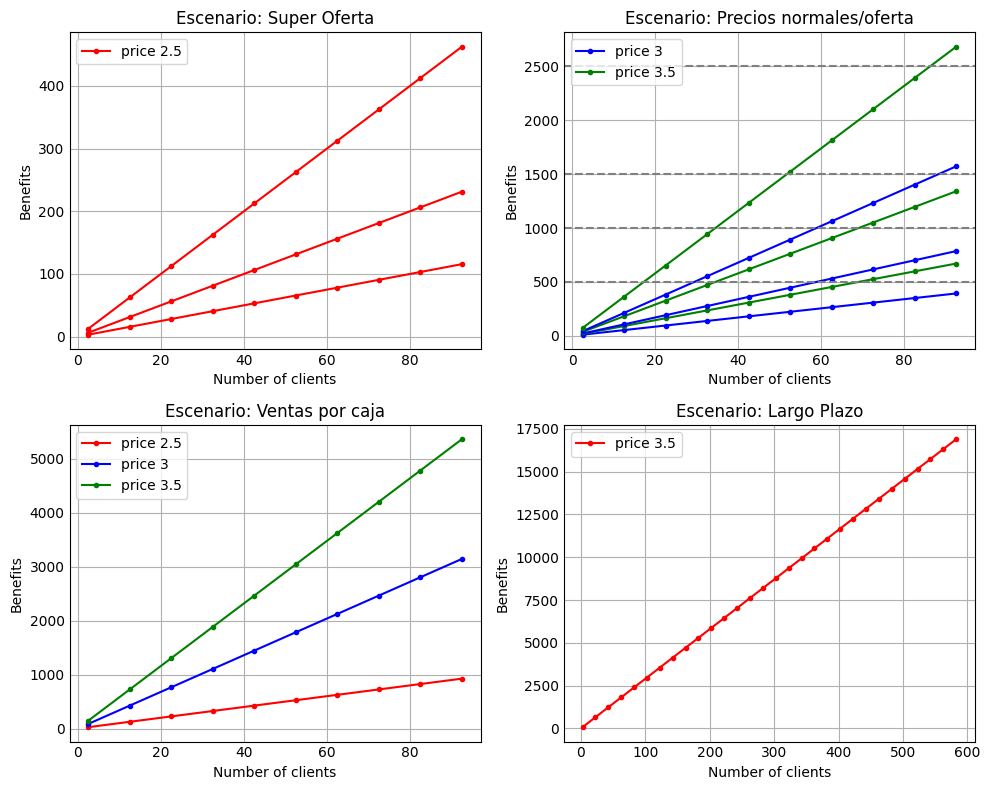

In [484]:
# Make data
P = d["utilidad"]
Q = np.linspace(0, 100, 20)
P, Q = np.meshgrid(P,Q)
I = P * Q

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(P, Q, I,
                cmap=mpl.colormaps['winter'] )
ax.set(xlabel='Utilidad', ylabel='Clientes', zlabel='Ingreso')

plt.show()


# now that we have the tree scenarios, we can plot tree lines depending if the price is low, medium or high
fig, plt.subplots(2,2, figsize=(10,8))


# FIRST PLOT
plt.subplot(2, 2, 1)
plt.plot(number_clients, benefit(number_clients , 0 , 0) , marker="." , color = 'red' , label = 'price 2.5' )
plt.plot(number_clients, benefit(number_clients , 0 , 1) , marker="." , color = 'red' )
plt.plot(number_clients, benefit(number_clients , 0 , 2) , marker="." , color = 'red'  )
plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Escenario: Super Oferta")
plt.legend()


# SECOND PLOT
plt.subplot(2, 2, 2)
# 6 cans per order
plt.plot(number_clients, benefit(number_clients , 1 , 0) , marker="." , color = 'blue' , label = 'price 3'  )
plt.plot(number_clients, benefit(number_clients , 2 , 0) , marker="." , color = 'green', label = 'price 3.5'  )

# 12 cans per order
plt.plot(number_clients, benefit(number_clients , 1 , 1) , marker="." , color = 'blue' )
plt.plot(number_clients, benefit(number_clients , 2 , 1) , marker="." , color = 'green' )

# 24 cans per order
plt.plot(number_clients, benefit(number_clients , 1 , 2) , marker="." , color = 'blue' )
plt.plot(number_clients, benefit(number_clients , 2 , 2) , marker="." , color = 'green' )

plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Escenario: Precios normales/oferta")
plt.legend()
plt.axhline(y = 500, color = 'gray', linestyle = 'dashed')
plt.axhline(y = 1000, color = 'gray', linestyle = 'dashed')
plt.axhline(y = 1500, color = 'gray', linestyle = 'dashed')
plt.axhline(y = 2500, color = 'gray', linestyle = 'dashed')

# THIRD PLOT
plt.subplot(2, 2, 3)
plt.plot(number_clients, benefit(number_clients , 0 , 3) , marker="." , color = 'red' , label = 'price 2.5' )
plt.plot(number_clients, benefit(number_clients , 1 , 3) , marker="." , color = 'blue' , label = 'price 3'  )
plt.plot(number_clients, benefit(number_clients , 2 , 3) , marker="." , color = 'green' , label = 'price 3.5' )
plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Escenario: Ventas por caja")
plt.legend()
# plt.annotate('FIRST LINE indicate an scenario where people buy 6 cans per order' +
#             '\nSECOND LINE indicate an scenario where people order 12 cans each time' +
#             '\nTHIRD LINE indicate an scenario where people order 24 cans each time' + 
#             '\nFirst line is on the botton, second in the middle and third line is on top.', xy = (0,-1), xycoords='axes fraction')

# FOURTH PLOT
plt.subplot(2, 2, 4)
plt.plot(np.arange(prices[0], 600 , 20),
          benefit(np.arange(prices[0], 600 , 20) ,
                   2 ,
                     2) ,
            marker="." ,
              color = 'red' ,
                label = 'price 3.5' )
plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Escenario: Largo Plazo")
plt.legend()

plt.tight_layout()
plt.show()

Entonces tenemos varios supuestos, uno optimista con el *precio de 3.5 por lata*, con un *costo fijo por caja de 110 soles* y que en promedio, cada *cliente nos compre 24 latas*,
esto nos daría con *100 ordenes/compras por mes*, una *utilidad neta mensual de 2900 soles*. Con 100 ordenes tenemos 25 ordenes que repartir por semana, lo cual es en realidad un número bajo y facil de manejar.
La idea cual sería, ingresar con un precio de 3 por lata (linea azul), suponiendo una venta promedio de 6 conservas por cliente, bajo este precio, considero que podemos llegar facilmente a tener 100 ventas por mes, el primer mes nos llevariamos de utilidades 500 soles, a ese monto restandole unos 50 soles de combustible y otros 50 de gastos de publicidad/marketing, digamos que nos quedarían unos 400 soles aproximadamente de utilidad neta, con un esfuerzo bajo/medio pero que nos serviría para ir introduciendo la marca poco a poco en el mercado. 

## ¿Cuáles son los siguientes pasos?
Mi idea es mantener ese esquema de precios y/o gasto en publicidad por un par de meses a lo mucho a fin de introducir la marca al mercado, posteriormente considero que la venta promedio de latas por cliente se iría incrementando dada la mayor confianza que nos tendrían y al mayor consumo provocado por el hecho de ya haber degustado el producto, pasando de 6 a 12 latas vendidas en promedio por persona, bajo este escenario, los ingresos se incrementarían a aproximadamente 900 soles.
Ahora, bajo este escenario, estaríamos vendiendo mensualmente aproximadamente 25 cajas, lo cual es un número bastante bajo en realidad, la tienda de pucallpa vende esa cantidad en uno o dos días como máximo, estoy seguro de que la cantidad de cajas vendidas por mes puede llegar con bastante facilidad a 50 en un muy corto plazo, eso ya nos dejaría unos 1800 soles de utilidad neta, ahora supongamos que vendieramos como en Pucallpa, cientos sino miles de cajas por mes, con tan solo 100 cajas tendríamos como 3600 soles de utilidad neta, con 200 cajas 7200 y con 300 cajas 14400 soles mensualmente, cifras realmente exhorbitantes.
Lydemar en pucallpa y puerto maldonado hace facturas por 100 cajas o más en ocasiones, entonces, no es dificil llegar a esos números, claro está, que si la idea principal es vender directamente al consumidor final para ganarnos todo el margen de ganancia, hay un mayor trabajo de reparto y por lo tanto tiene que pensarse en como escalar el proyecto, tarde o temprano se necesitará contratar más personas para reparto, pero la idea está ahí, es viable, no tiene pérdida y que tanto demoremos en llegar a los 14400 S/. mensuales de utilidad neta dependerá de el esfuerzo que le metamos a la página web, las redes sociales, la publicidad pagada por distintos medios, la experiencia del consumidor y nuestra operación de reparto, entre otras cosas, así que ahí esta el camino, a meterle fuerza.

## ETAPAS
### ETAPA 1
El primer o dos primeros meses se tendrán utilidades(no ganancias) modestas de menos de mil soles, parte de ellas se reinvertirán en publicidad de distintas maneras con tal de ingresar más al mercado

### ETAPA 2
En los meses siguientes las ventas siguen aumentando, se sigue invirtiendo en publicidad para vender más, pasamos la valla de los mil soles de utilidades por mes, en este periodo si o si ya debe haber venta también a intermediarios, no solo a consumidores finales, lo bueno de vender a intermediarios que quieran vender nuestro producto es que ellos compran por caja, no por latas, así que nos ahorran en tiempos de entrega, son un mercado más a abrir.

### ETAPA 3
Tenemos menos de un año pero más de 6, ya pasamos los dos mil soles de utilidades mensuales y el negocio ya ha madurado un poco más, conocemos a nuestro publico objetivo y los problemas del modelo de negocio, ahora tenemos que ver como escalar más el negocio.

### ETAPA 4
Ya teniendo más de un año, dado nuestro modelo disruptivo, el negocio genera más de 5 mil soles mensuales, ya no es posible manejar el negocio solo en tiempos libres, tal vez no, tendría que dejar de trabajar y dedicarme enteramente a escalarlo más y que no se desborde o se pierda el público por una atención deficiente.

### ETAPA 5
El negocio ya cuenta con más de 2 años, seguramente ya se hicieron cambios en el modelo, se incluyeron más productos(no solo conservas) lo cual hace que se venda un mayor monto por usuario, posiblemente hasta se deja que los intermediarios se encarguen de la mayor parte de la venta de los productos y no hagamos solo nosotros toda la venta hacia el consumidor final (en caso no hayamos podido escalar correctamente el modelo de venta directa), gran parte de las ventas son por cajas, ya no por 6 unidades, entonces deberiamos estar pasando los 8 mil soles mensuales de utilidades.

### ETAPA 6
Desde esta etapa los ingresos deben estar pasando los doce mil soles mensuales, claro está ya no es posible crecer más solo nosotros ni dedicandonos a tiempo completo, es requerido más personal, este personal adicional puede venir desde la etapa 4 o 5, dependiendo si se ve necesario para crecer de manera mucho más rápida y sin volverse una actividad extenuante, se vuelve necesario el tener que comenzar a delegar tareas hacia terceros, con ello aseguramos que el negocio siga escalando, que todo quede más ordenado, que la empresa vaya teniendo una estructura y que en cierto modo se logre lo que ya existe en Pucallpa, recibir grandes utilidades con poco esfuerzo.

Estas fechas, montos y plazos son hipotéticos, desde lo que se esperaría que se alcanzara por mes, considero que pueden ser incluso mucho mayores desde mucho antes todo dependerá que tanto explotemos la idea de negocio, nos adaptemos y nos reinventemos.  
Así mismo, todo esto está escrito previo al inicio del negocio, deberá ser ajustado conforme se inicien las operaciones y revisado mensualmente.

